### here I will look at the relative allele depths for the backcrossed individuals compared to those of the pure species . . . this should tell me if they are triploid or not. 

In [6]:
from __future__ import division
import vcf

In [7]:
myvcf = open("/Users/danieljeffries/Dropbox/PhD/Dans_PhD_Shared/Papers/Hybridisation paper/Backcrosses/batch_1.vcf", 'r').readlines()

In [8]:
samples_allele_depths = {}
sample_locus_depths = {}
sample_names = []

for record in myvcf:
    if record.startswith("#"):
        if not record.startswith("##"):
            sample_indexes = []
            field_counter = 0
            non_sample_fields = ["#CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT"]
            all_fields = []
            
            for field in record.split():
                
                all_fields.append(field)
                
                if field not in non_sample_fields:
                    sample_indexes.append(field_counter)
                    
                    if field not in sample_locus_depths:
                        sample_locus_depths[field] = []
                    
                    if field not in samples_allele_depths:
                        samples_allele_depths[field] = []
                    
                field_counter += 1
                
            #print all_fields, len(all_fields)
    else:
        data = record.split()
        
        for sample in sample_indexes:
            #print sample
            sample_data = data[sample]
            
            genotype = sample_data.split(":")[0]
            depth = int(sample_data.split(":")[1])
            AD = sample_data.split(":")[2]
            
            if genotype in ["0/1", "1/0"]:
                if depth >= 20:
                    
                    sample_locus_depths[all_fields[sample]].append(depth)
                    
                    A1 = max([int(i) for i in AD.split(",")])
                    A2 = min([int(i) for i in AD.split(",")])

                    ADR = A1/A2

                    samples_allele_depths[all_fields[sample]].append(ADR)

                #print all_fields[sample], sample_data, A1, A2, ADR
                
#print samples_allele_depths

In [19]:
sample_loci_numbers = []

for i in samples:
    print i, len(samples_allele_depths[i])
    sample_loci_numbers.append(len(samples_allele_depths[i]))

BEL5_2_RD-P1-129_1.fil 1559
BEL5_3_RD-P1-130_1.fil 178
BEL5_4_RD-P1-166_1.fil 1550
BEL5_5_RD-P1-170_1.fil 1780
BEL5_6_RD-P1-194_1.fil 54
SWE10_1_1.fil 132
SWE10_2_1.fil 117
SWE10_3_1.fil 94
SWE10_4_1.fil 103
SWE10_5_1.fil 66
SWE10_6_1.fil 117
SWE10_7_1.fil 59
SWE10_8_1.fil 59
SWE10_9_1.fil 106
SWE14_10_1.fil 38
SWE14_11_1.fil 100
SWE14_13_1.fil 117
SWE14_16_1.fil 148
SWE14_2_1.fil 105
SWE14_3_1.fil 49
SWE14_4_1.fil 25
SWE14_6_1.fil 64
SWE14_8_1.fil 57
SWE20_11_RD-P1-110_1.fil 1327
SWE20_6_RD-P1-192_1.fil 815
SWE20_7_RD-P1-144_1.fil 3418
SWE20_8_RD-P1-111_1.fil 3103
UKR1_1_1.fil 833
UKR1_6_1.fil 937
UKR1_7_1.fil 859


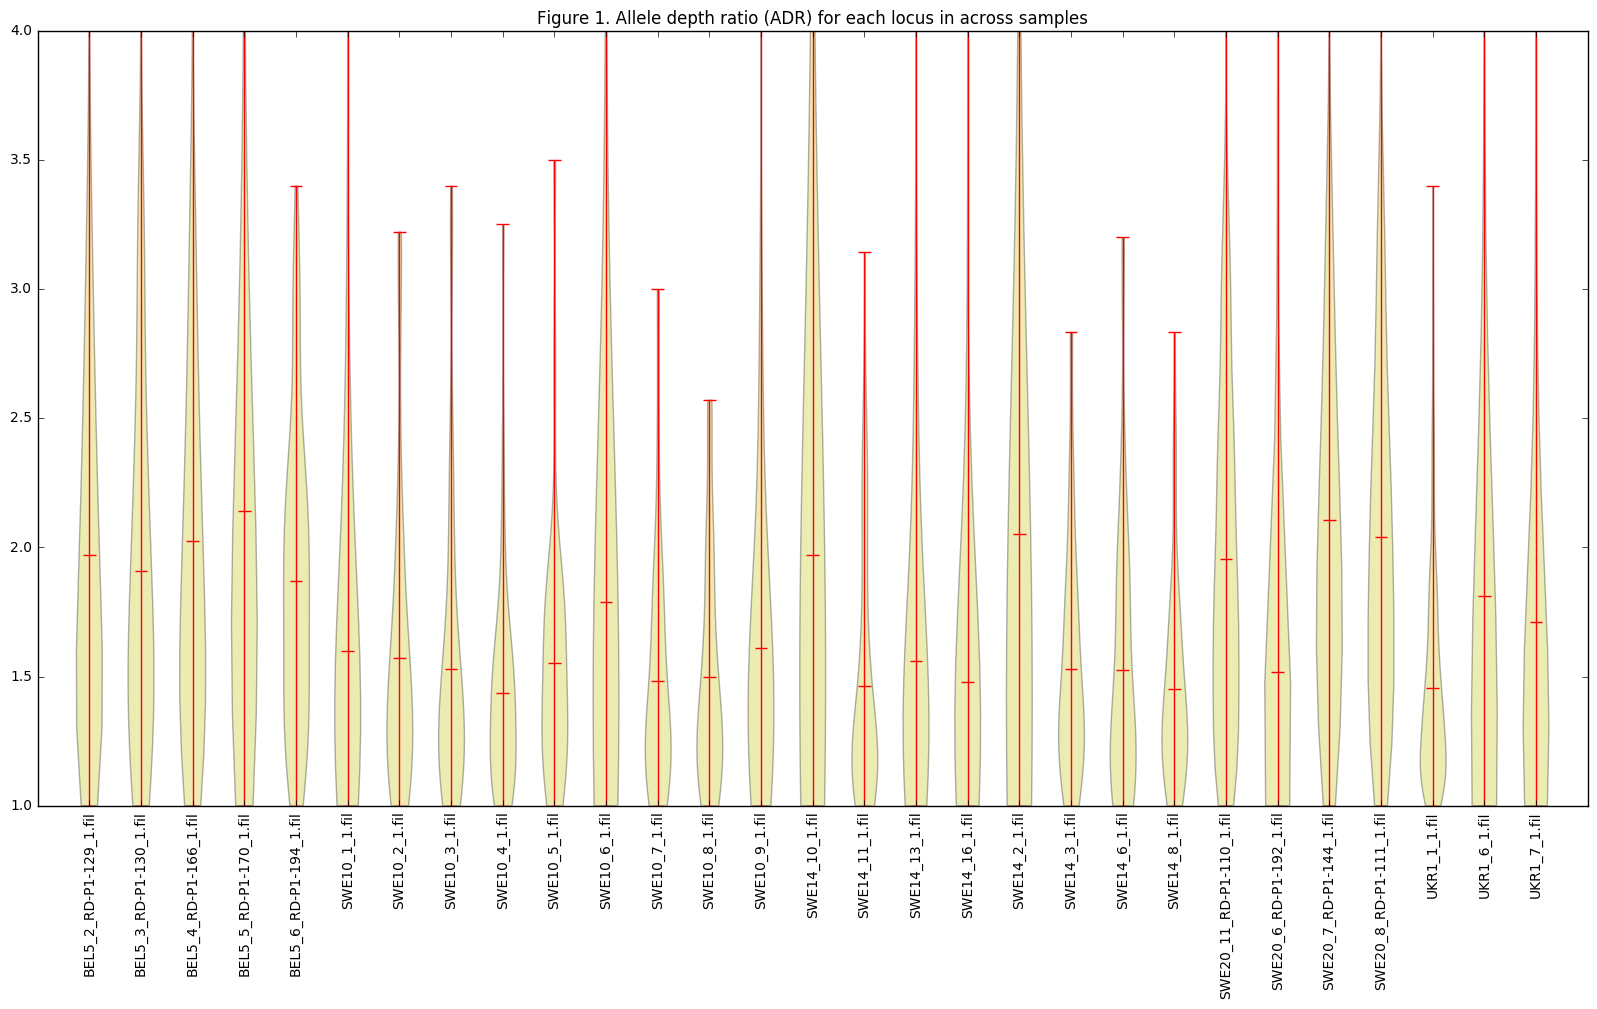

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(1,1,1)

position = 1

samples = sorted(samples_allele_depths.keys())

#print samples

kept_samples = []

for sample in samples:
    if len(samples_allele_depths[sample]) > 30:
        kept_samples.append(sample)
        ax.violinplot(samples_allele_depths[sample], positions = [position], showmeans=True)
        position+= 1

plt.ylim(1,4)
plt.xticks(range(1,len(kept_samples)+1),kept_samples, rotation = 90)
plt.title("Figure 1. Allele depth ratio (ADR) for each locus in across samples")
plt.show()




 I have tried to control for the effect of low coverage loci driving higher between-allele divergence, but is there still a correlation between ADR and the mean coverage of the sample? 

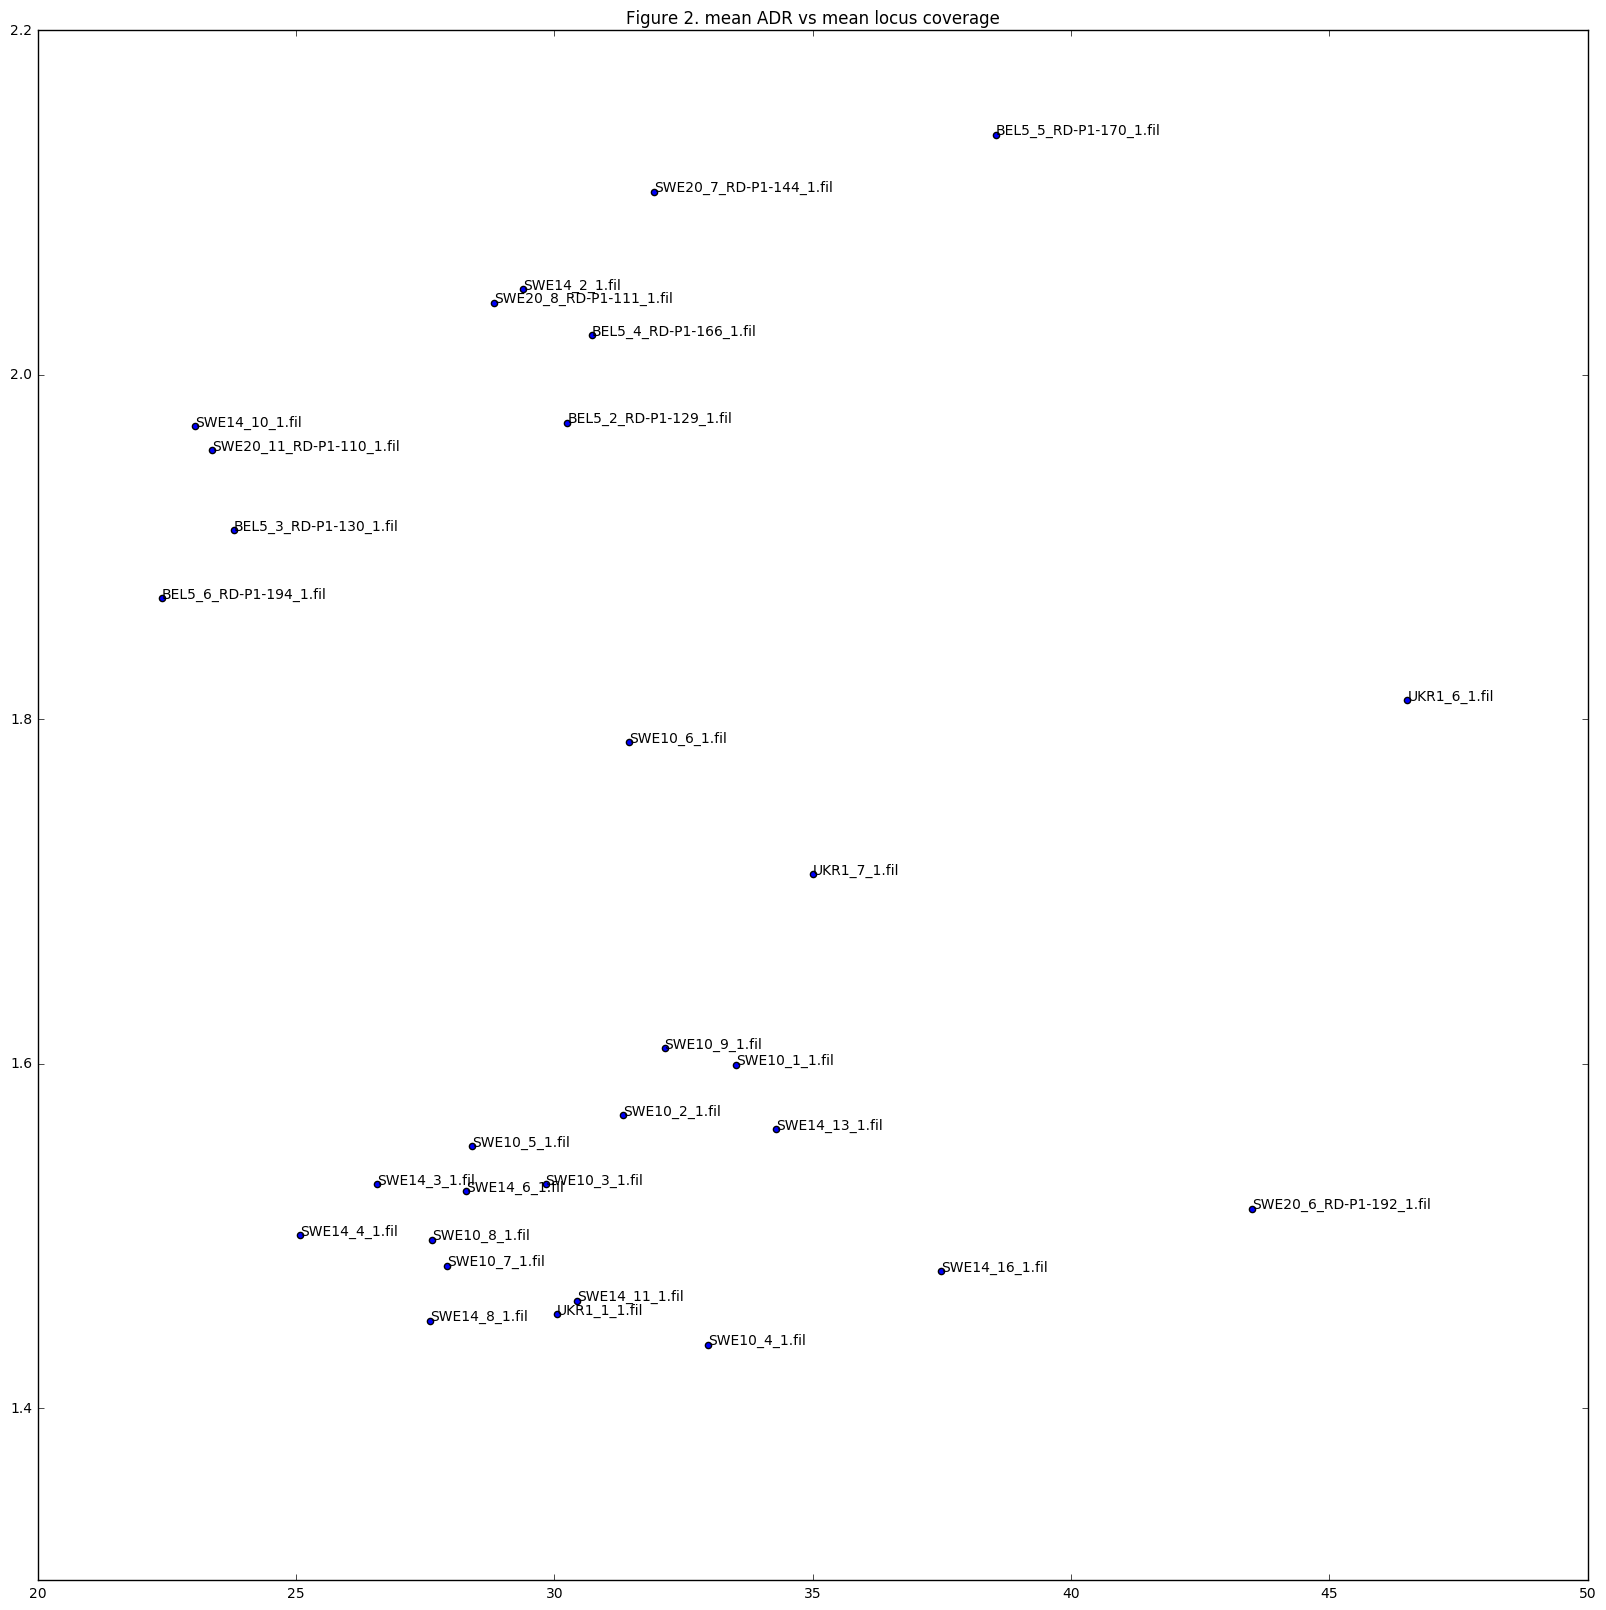

In [28]:
import numpy as np

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)

sample_mean_ADRs = []

for sample in sample_locus_depths:
    x = np.mean(sample_locus_depths[sample])
    y = np.mean(samples_allele_depths[sample])
    
    sample_mean_ADRs.append(y)
    
    ax.scatter(x,y)
    ax.text(x,y,sample)
    
plt.title("Figure 2. mean ADR vs mean locus coverage")
plt.show()

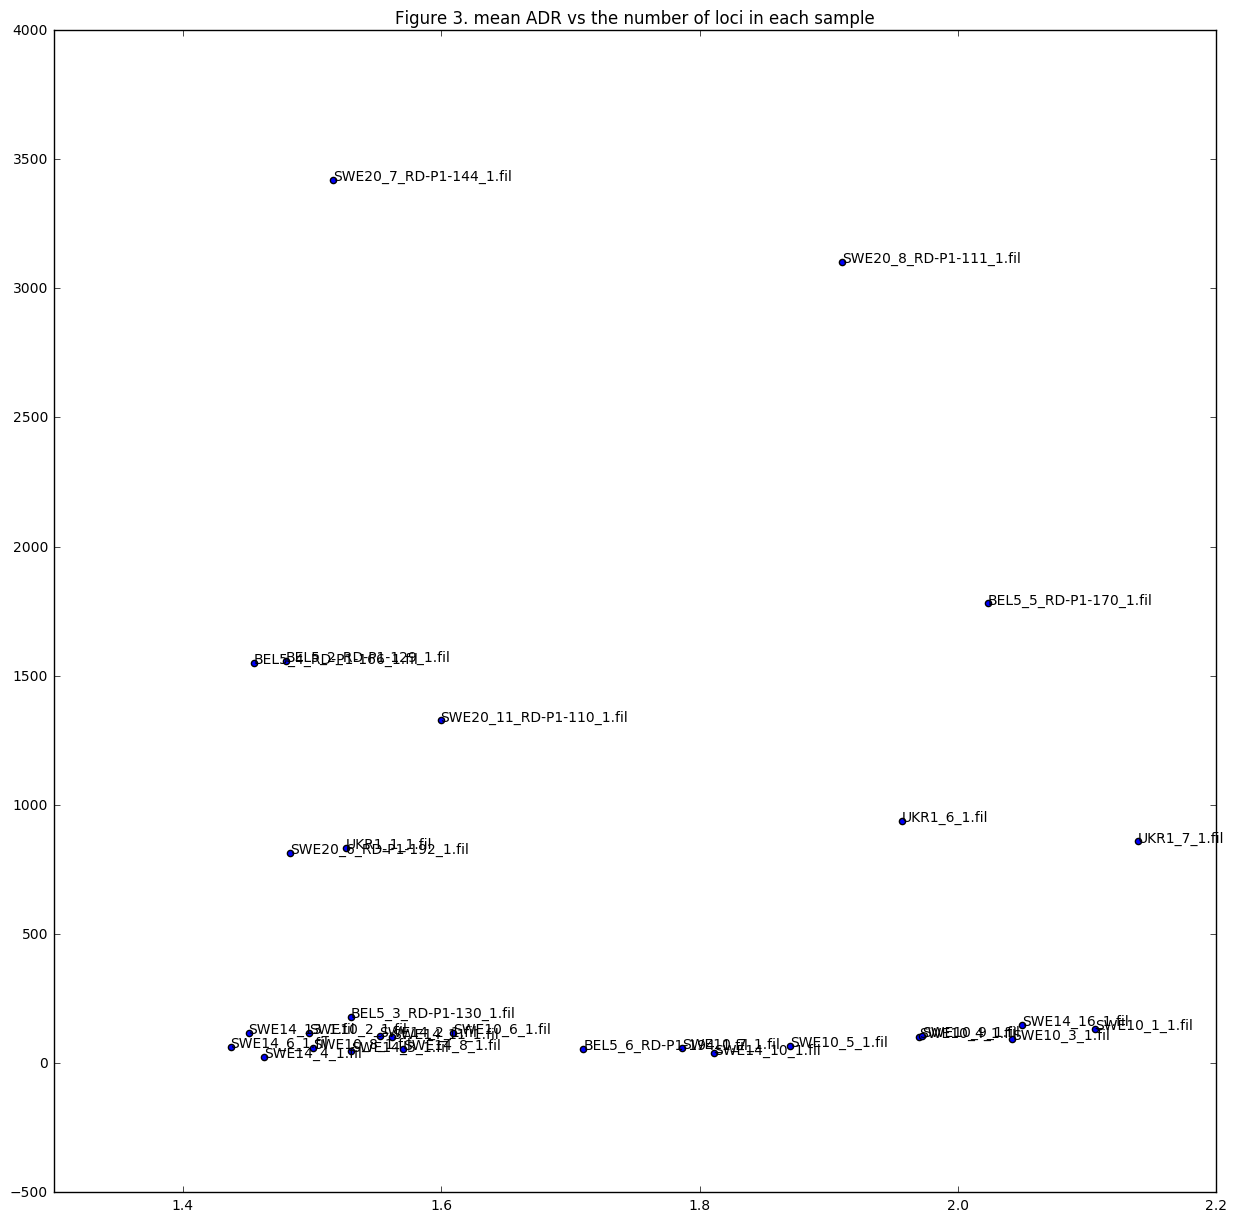

In [30]:
### plot number ADR agains the number of loci for each sample. 

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111)

sample_ID = 0
for i in samples:
    ax.scatter(sample_mean_ADRs[sample_ID], sample_loci_numbers[sample_ID])
    ax.text(sample_mean_ADRs[sample_ID], sample_loci_numbers[sample_ID], samples[sample_ID])
    sample_ID += 1
plt.title("Figure 3. mean ADR vs the number of loci in each sample")
plt.show()

### Summary

There are some samples with an allele depth variation which is much higher than the others, which would be expected under triploidy. 

However not only do the 3 backcrosses look triploid, but the several of the supposedly pure gibel samples also look like this, and one crucian as well.

Becuase it is necassary to always divide the highest-depth allele by the lowest, the values in Fig. 1 are always above 1. Many samples (which should be pure crucian) have a baseline of 1.5, which likely incorporates the plus and minus variation between allele depths in the sequencing of a conventional diploid locus. 

Another set of samples cluster around 2. However given that the diploids have a baseline of 1.5, it might be expected that the triploids have a baseline of 2.5. There is a reason for this, but I fogot - remember this.


One thing to do would be to plot just the raw coverages of the highest and lowest depth alleles, so no ratios required. This would get rid of some potential artifacts I think. 



